## Customer demographics Analysis

The data that we have is with impurities and before we proceed to start analyzing it or predicting anything we will clean the data. The excel file is divided into 3 main tables:

1. Transactions data
2. Customer demographics data
3. Customer Address data

In this notebook we will clean customer demographics table and do some preprocessing to make it reliable for analysis. 

In [133]:
# imports 

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [134]:
%%capture
# currrent working directory
cwd = os.getcwd()
df_demo = pd.read_excel(cwd+"/KPMG_sprocket.xlsx",'CustomerDemographic', header=1)


# transaction data to match customer ids
df_trans = pd.read_excel(cwd+"/cleaned_sprocket.xlsx",'Transactions', header=0, index_col=0)

ValueError: Worksheet named 'Transactions' not found

In [135]:
df_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [136]:
df_demo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [137]:
df_demo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [138]:
# gender column evaluate
df_demo.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

Let's clean the gender column first. The classification naming is not consistent so we will have short forms of F and M consistent. 

In [139]:
# relace the incorrect values

df_demo.gender = df_demo.gender.replace({"Female": "F","Male":"M", "Femal":"F"})

In [140]:
# gender column evaluate
df_demo.gender.value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

We will treat "U" as gender not provided or unidentified. 

<AxesSubplot:xlabel='past_3_years_bike_related_purchases', ylabel='Count'>

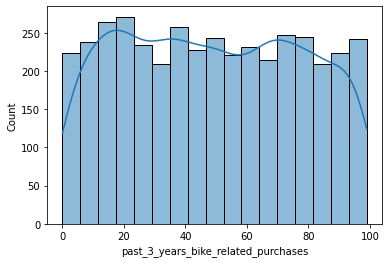

In [141]:
sns.histplot(data=df_demo, x="past_3_years_bike_related_purchases", kde=True)

We can group the above data into 3 categories as high , medium and low. 

In [142]:
df_demo['purchases_3_years'] = np.where(df_demo.past_3_years_bike_related_purchases <30, "low",
                                        np.where(df_demo.past_3_years_bike_related_purchases >60, "high","medium"))
                                       

In [143]:
df_demo.purchases_3_years.value_counts()

high      1528
medium    1242
low       1230
Name: purchases_3_years, dtype: int64

In [144]:
df_demo.DOB.dt.year.value_counts().sort_index()

1843.0      1
1931.0      1
1935.0      1
1940.0      1
1943.0      1
1944.0      1
1953.0     19
1954.0     61
1955.0     58
1956.0     63
1957.0     71
1958.0     55
1959.0     94
1960.0     58
1961.0     60
1962.0     76
1963.0     59
1964.0     85
1965.0     69
1966.0     65
1967.0     73
1968.0     69
1969.0     78
1970.0     57
1971.0     88
1972.0     54
1973.0    122
1974.0    152
1975.0    114
1976.0    152
1977.0    204
1978.0    217
1979.0    118
1980.0    123
1981.0     79
1982.0     41
1983.0     40
1984.0     43
1985.0     91
1986.0    114
1987.0     72
1988.0     72
1989.0     74
1990.0     53
1991.0     48
1992.0     74
1993.0     60
1994.0     79
1995.0     90
1996.0     67
1997.0     74
1998.0     80
1999.0     60
2000.0     42
2001.0     34
2002.0      6
Name: DOB, dtype: int64

We will remove the year 1843 because it is definitely an error. It could eiter be 1943. We will assume tht it is 1943 instead of 1843. 

In [145]:
# replace the year 1943

df_demo.DOB = df_demo.DOB.replace("1843-12-21", "1943-12-21")

In [146]:
# job_title
df_demo.job_title = df_demo.job_title.fillna("Other")

In [147]:
# job industry category
df_demo.job_industry_category = df_demo.job_industry_category.fillna("Other")

In [148]:
df_demo.wealth_segment.value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [149]:
# drop the default column

df_demo.drop("default",axis=1, inplace=True)

In [150]:
# tenure

df_demo.tenure.value_counts().sort_index()

1.0     166
2.0     150
3.0     160
4.0     191
5.0     228
6.0     192
7.0     235
8.0     211
9.0     200
10.0    218
11.0    221
12.0    202
13.0    191
14.0    200
15.0    179
16.0    215
17.0    182
18.0    208
19.0    159
20.0     96
21.0     54
22.0     55
Name: tenure, dtype: int64

In [151]:
# let's divide the tenure in 4 equal range of months

df_demo["tenure_group"] = np.where(df_demo.tenure <6.0, "0-6 Months", 
                                np.where((df_demo.tenure >6.0) & (df_demo.tenure <12.0), "6-12 Months", 
                                        np.where((df_demo.tenure > 12.0) & (df_demo.tenure <18.0), "12-18 Months",
                                                "18-24 Months")))



In [152]:
df_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,purchases_3_years,tenure_group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,high,6-12 Months
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,high,12-18 Months
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,high,12-18 Months
3,4,Talbot,NaN,M,33,1961-10-03,Other,IT,Mass Customer,N,No,7.0,medium,6-12 Months
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,Other,Affluent Customer,N,Yes,8.0,medium,6-12 Months


<AxesSubplot:xlabel='tenure', ylabel='Count'>

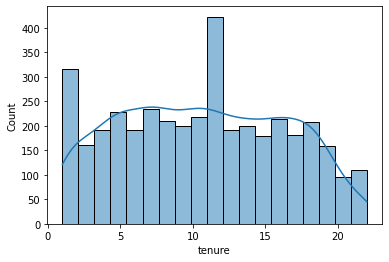

In [153]:
# histogram of tenure data
sns.histplot(data=df_demo, x="tenure", kde=True)

In [154]:
len(df_trans.customer_id.unique())

3494

### Create age group from Date of Birth

In [155]:
df_demo["age"] = dt.today().year - df_demo.DOB.dt.year

In [156]:
df_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,purchases_3_years,tenure_group,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,high,6-12 Months,69.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,high,12-18 Months,42.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,high,12-18 Months,68.0
3,4,Talbot,NaN,M,33,1961-10-03,Other,IT,Mass Customer,N,No,7.0,medium,6-12 Months,61.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,Other,Affluent Customer,N,Yes,8.0,medium,6-12 Months,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,F,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,low,18-24 Months,47.0
3996,3997,Blanch,Nisuis,F,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,high,0-6 Months,21.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN,medium,18-24 Months,NaN
3998,3999,Patrizius,NaN,M,11,1973-10-24,Other,Manufacturing,Affluent Customer,N,Yes,10.0,low,6-12 Months,49.0


There is an NaT value in the DOB and we will delete that row.

In [157]:
# drop the row that has Nat in the DOB column
df_demo.drop(3997, inplace=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

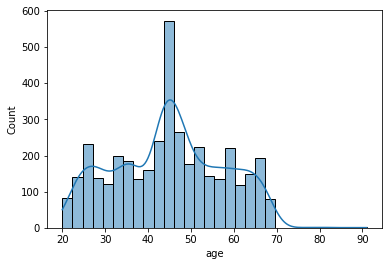

In [158]:
sns.histplot(data=df_demo, x='age', kde=True)

In [159]:
# create the age group

df_demo["age_group"] = np.where(df_demo.age <30 ,  "Young",
                                np.where((df_demo.age >30) & (df_demo.age <60), "Adult", "Senior Citizen"))

In [160]:
df_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,purchases_3_years,tenure_group,age,age_group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,high,6-12 Months,69.0,Senior Citizen
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,high,12-18 Months,42.0,Adult
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,high,12-18 Months,68.0,Senior Citizen
3,4,Talbot,NaN,M,33,1961-10-03,Other,IT,Mass Customer,N,No,7.0,medium,6-12 Months,61.0,Senior Citizen
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,Other,Affluent Customer,N,Yes,8.0,medium,6-12 Months,45.0,Adult


## Export the data


In [161]:
df_demo.to_excel(cwd + "/cleaned_sprocket.xlsx", "Customer Demographics")